# Problem Set #1: Supervised Learning

## 1. [40 points] Linear Classifiers (logistic regression and GDA)

### (a)

### (b)

### (c) 
here we use the bayes' rule to obtain the posterior probability $p(y=1 \mid x)$ :
$$
\begin{align*}
    p(y=1 \mid x) & = \frac{p(x \mid y=1)p(y=1)}{p(x \mid y=0)p(y=0)+p(x \mid y=1)p(y=1)}\\

    & = \frac{exp(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1))\phi}{exp(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0))(1-\phi)+exp(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1))\phi}\\

    & = \frac{1}{1+exp(-\frac{1}{2}((x-\mu_0)^T\Sigma^{-1}(x-\mu_0)-(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)))\frac{1-\phi}{\phi}}\\

    & = \frac{1}{1+exp(-((\mu_1^T\Sigma^{-1}-\mu_0^T\Sigma^{-1})x+\frac{1}{2}(\mu_0^T\Sigma^{-1}\mu_0-\mu_1^T\Sigma^{-1}\mu_1)+ln(\frac{\phi}{1-\phi})))}
\end{align*}
$$
so it is easy to represent the $p(y=1 \mid x)$ in form of $\frac{1}{1+exp(-(\theta^Tx+\theta_0))}$,
where $\theta^T = \mu_1^T\Sigma^{-1}-\mu_0^T\Sigma^{-1}$,$\theta_0 = \frac{1}{2}(\mu_0^T\Sigma^{-1}\mu_0-\mu_1^T\Sigma^{-1}\mu_1)+ln(\frac{\phi}{1-\phi})$

### (d)
calculate the log likelihood the first:
$$
\begin{align*}
l(\phi,\mu_0,\mu_1,\Sigma) &\ = \sum_{i=1}^m log(p(x^i \mid y^i)) + \sum_{i=1}^m log(p(y^i))\\

&=\sum_{i=1}^m (1-y^i)log(\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu_0)^2}{2\sigma^2}})
+y^ilog(\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu_1)^2}{2\sigma^2}})
+\sum_{i=1}^m y^i log(\phi) +(1-y^i)log(1-\phi) \\

&=\sum_{i=1}^m (1-y^i)(-log(\sqrt{2\pi}\sigma)-\frac{(x-\mu_0)^2}{2\sigma^2})
+y^i(-log(\sqrt{2\pi}\sigma)-\frac{(x-\mu_1)^2}{2\sigma^2})
+\sum_{i=1}^m y^i log(\phi) +(1-y^i)log(1-\phi) \\
\end{align*}
$$
Then it's easy to obtain the first order partial derivatives:
$$
\begin{align*}
\frac{\partial}{\partial\sigma} l & = \sum_{i=1}^m (1-y^i)(-\frac{1}{\sigma}+\frac{(x-\mu_0)^2}{\sigma^3})+y^i(-\frac{1}{\sigma}+\frac{(x-\mu_1)^2}{\sigma^3}) \\
& = \frac{m}{\sigma^3}(\frac{\sum_{i=1}^m (x^i-\mu_{y^i})^2}{m}-\sigma^2)\\
\frac{\partial}{\partial\mu_0} l & =  \\
\frac{\partial}{\partial\mu_1} l & =  \\
\frac{\partial}{\partial\phi} l & = \sum_{i=1}^m \frac{y^i}{\phi}-\frac{1-y^i}{1-\phi}\\
& = \frac{m}{\phi(1-\phi)}(\frac{\sum_{i=1}^m y^i}{m}-\phi)
\end{align*}
$$
Through which we are able to gain the MLE of this problem under n=1

### (e)

In [8]:
import src.util as util
x_train,y_train = util.load_dataset('/Users/apple/Documents/Opencourses/CS229-fall-2018/stanford-notes/problem-sets/PS1/data/ds1_train.csv', add_intercept=False)


In [9]:
import sys
sys.path.append('src')
from src.p01e_gda import GDA
clf_1=GDA()
clf_1.fit(x_train,y_train)
clf_1.theta

array([-6.17158405,  2.22055506, -0.01763375])

### (f)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('src')
from src import util
from src.p01b_logreg import LogisticRegression
from src.p01e_gda import GDA
train_path='data/ds1_train.csv'
x_train, y_train = util.load_dataset(train_path, add_intercept=True)

x=np.linspace(0,7)
clf_0=LogisticRegression()
clf_0.fit(x_train,y_train)
theta=clf_0.theta
y0=-(x*theta[1]+theta[0])/theta[2]

clf_1=GDA()
clf_1.fit(x_train[:,1:],y_train)
theta=clf_1.theta
y1=-(x*theta[1]+theta[0])/theta[2]

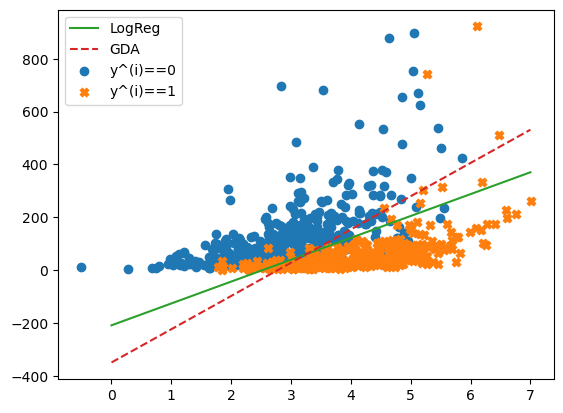

In [3]:
plt.scatter(x_train[y_train==0][:,1],x_train[y_train==0][:,2],marker='o')
plt.scatter(x_train[y_train==1][:,1],x_train[y_train==1][:,2],marker='X')
plt.plot(x,y0,'C2')
plt.plot(x,y1,'C3--')
plt.legend(['LogReg','GDA','y^(i)==0','y^(i)==1',])

### (g)

In [5]:
train_path='data/ds2_train.csv'
x_train, y_train = util.load_dataset(train_path, add_intercept=True)

x=np.linspace(0,7)
clf_0=LogisticRegression()
clf_0.fit(x_train,y_train)
theta=clf_0.theta
y0=-(x*theta[1]+theta[0])/theta[2]

clf_1=GDA()
clf_1.fit(x_train[:,1:],y_train)
theta=clf_1.theta
y1=-(x*theta[1]+theta[0])/theta[2]

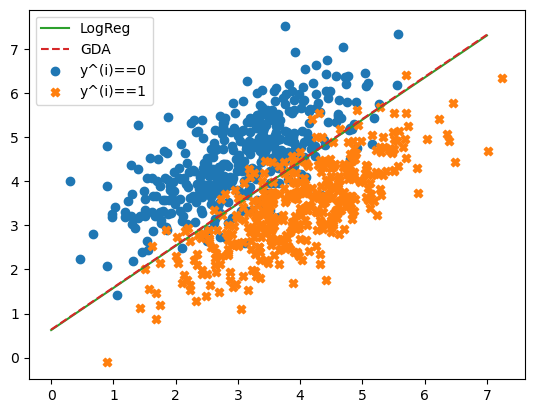

In [6]:
plt.scatter(x_train[y_train==0][:,1],x_train[y_train==0][:,2],marker='o')
plt.scatter(x_train[y_train==1][:,1],x_train[y_train==1][:,2],marker='X')
plt.plot(x,y0,'C2')
plt.plot(x,y1,'C3--')
plt.legend(['LogReg','GDA','y^(i)==0','y^(i)==1',])

## 2. [30 points] Incomplete, Positive-Only Labels

### (a)

$$
\begin{align*}
p(y^i=1 \mid x^i)&=p(y^i=1 \mid x^i , t^i=1)p(t^i=1\mid x^i)\\
&=p(y^i=1 \mid t^i=1)p(t^i=1\mid x^i)
\end{align*}
$$
取$\alpha:=p(y^i=1 \mid t^i=1)$则有$p(t^i=1 \mid x^i)=p(y^i=1 \mid x^i)/\alpha$

### (b)

易证，略

### (c)

In [1]:
import numpy as np
import sys
sys.path.append('src')
import util

from p01b_logreg import LogisticRegression


In [6]:

# Character to replace with sub-problem letter in plot_path/pred_path
WILDCARD = 'X'


def main(train_path, valid_path, test_path, pred_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    pred_path_c = pred_path.replace(WILDCARD, 'c')
    pred_path_d = pred_path.replace(WILDCARD, 'd')
    pred_path_e = pred_path.replace(WILDCARD, 'e')

    # *** START CODE HERE ***
    # Part (c): Train and test on true labels
    # Make sure to save outputs to pred_path_c
    x_train,t_train=util.load_dataset(train_path,label_col='t',add_intercept=True)
    x_test,t_test=util.load_dataset(test_path,label_col='t',add_intercept=True)
    clf=LogisticRegression()
    clf.fit(x_train,t_train)

    t_hat=clf.predict(x_test)
    np.savetxt(pred_path_c,t_hat)
    
    # Part (d): Train on y-labels and test on true labels
    # Make sure to save outputs to pred_path_d
    x_train,y_train=util.load_dataset(train_path,add_intercept=True)
    clf=LogisticRegression()
    clf.fit(x_train,y_train)

    t_hat=clf.predict(x_test)
    np.savetxt(pred_path_d,t_hat)
    # Part (e): Apply correction factor using validation set and test on true labels
    # Plot and use np.savetxt to save outputs to pred_path_e
    
    # *** END CODER HERE


[-0.9711418   2.73208784  1.07403478]


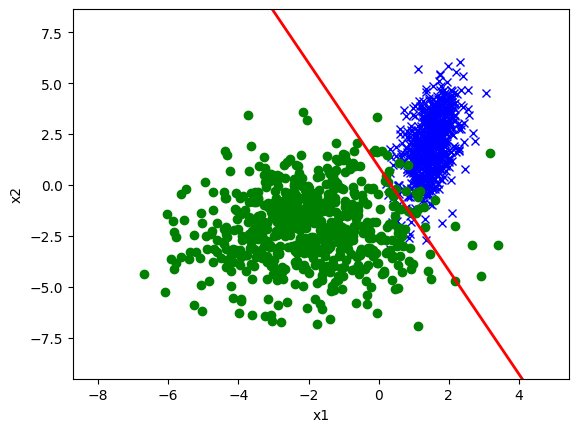

In [23]:
train_path='data/ds3_train.csv'
test_path='data/ds3_test.csv'
pred_path='data/ds3_pred_c.csv'

x_train,t_train=util.load_dataset(train_path,label_col='t',add_intercept=True)
x_test,t_test=util.load_dataset(test_path,label_col='t',add_intercept=True)
clf_c=LogisticRegression()
clf_c.fit(x_train,t_train)
print(clf_c.theta)

t_hat=clf_c.predict(x_test)
np.savetxt(pred_path,t_hat)
theta_c=clf_c.theta
util.plot(x_train,t_train,theta_c)

[-2.91607454  0.78596651  0.09282768]


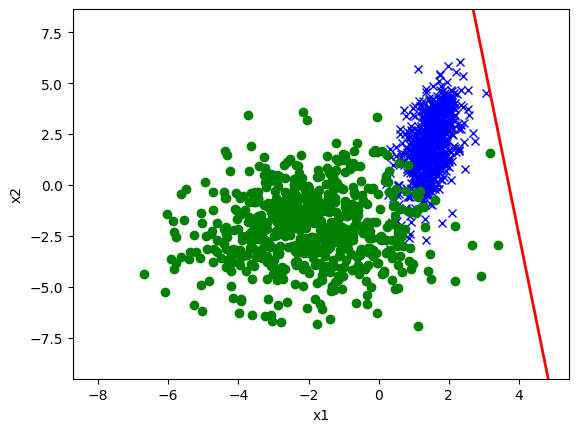

In [24]:
pred_path='data/ds3_pred_d.csv'

x_train,y_train=util.load_dataset(train_path,add_intercept=True)
x_test,y_test=util.load_dataset(test_path,add_intercept=True)
clf_d=LogisticRegression()
clf_d.fit(x_train,y_train)
print(clf_d.theta)

t_hat=clf_d.predict(x_test)
np.savetxt(pred_path,t_hat)
theta_d=clf_d.theta
util.plot(x_train,t_train,theta_d)

In [25]:
valid_path='data/ds3_valid.csv'
x_valid,y_valid=util.load_dataset(valid_path,add_intercept=True)
clf_e=LogisticRegression()
clf_e.fit(x_valid,y_valid)
v_plus=x_valid[y_valid==1]
alpha=clf_e.predict(v_plus).mean()
alpha

np.float64(0.16174807476395248)

In [26]:
t_hat=clf_e.predict(x_test)/alpha
np.savetxt(pred_path,t_hat)

as 
$$
p(t^i=1 \mid x^i)=p(y^i=1 \mid x^i)/\alpha
$$ 
and 
$$
p(y^i=1 \mid x^i)=h(\theta)=\frac{1}{1+e^{-\theta^Tx}}
$$
therefore the decision boundary can be attained through formula:
$$
p(t^i=1 \mid x^i)=\frac{1}{\alpha(1+e^{-\theta^Tx})}=0.5
$$
which can be further transformed into a linear form:
$$
\theta^Tx=-ln(\frac{2}{\alpha}-1)
$$

In [27]:
theta_e=clf_e.theta
theta_e[0]+=np.log(2/alpha-1)
theta_e

array([-0.45759382,  0.79675594,  0.0309376 ])

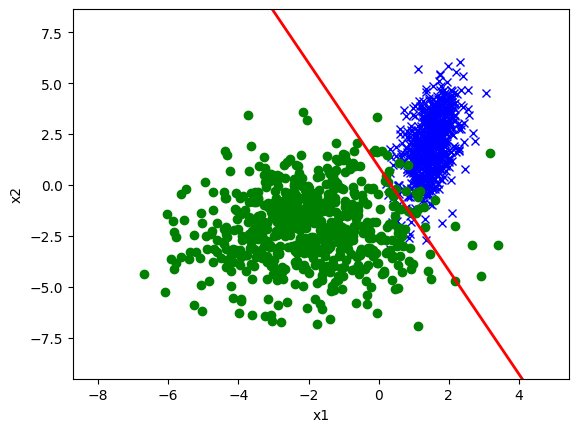

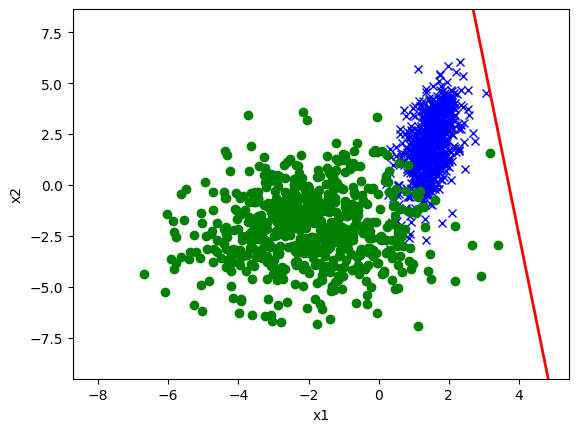

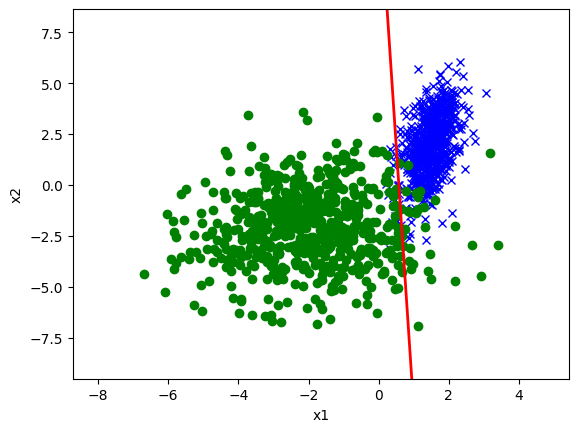

In [28]:
util.plot(x_train,t_train,theta_c)
util.plot(x_train,t_train,theta_d)
util.plot(x_train,t_train,theta_e)

## 3. [25 points] Poisson Regression

### (a)

as we know, exponential family is a family of probability distributions that can be expressed in form:
$$
p(x;\theta) = h(x) \exp \left( \sum_{i=1}^{k} \theta_i T_i(x) - A(\theta) \right)
$$
and the poison distribution's density function is:
$$
p(x;\lambda) = \frac{e^{-\lambda} \lambda^x}{x!}
$$
which can be expressed in form:
$$
p(x;\lambda) = \frac{1}{y!}\exp \left(  ln(\lambda)y- \lambda \right)
$$
Therefore, we can tell that poison distribution is a exponential family distribution. And $b(y)=1/y!$ ,$\eta=ln(\lambda)$,$T(y)=y$,$\alpha(\eta)=\lambda$.

### (b)

$$
\begin{align*}
    h_\theta &=E(y\mid x;\eta)\\
    &=\lambda\\
    &=exp(\eta)\\
    &=exp(\theta^T x)\\
\end{align*}
$$

### (c)

$$
\frac{\partial}{\partial \theta_j}ln(p(y\mid x;\theta))=x^j y-exp(\theta^T x)x^j
$$

### (d)

In [1]:
import numpy as np
import sys
sys.path.append('src')
import util
from p03d_poisson import PoissonRegression


In [2]:
train_path='data/ds4_train.csv'
x_train,y_train=util.load_dataset(train_path,add_intercept=True)
#here the step size must be small enough to make the gradient descent converge
clf=PoissonRegression(step_size=2e-7)
clf.fit(x_train,y_train)
print(clf.theta)

[7.17225984 3.83396268 3.33829717 2.104626   4.67158841]


## 4. [15 points] Convexity of Generalized Linear Models

### （a）

$$
\begin{align*}
    E(Y \mid X;\theta) &= \int_{-\infin}^{+\infin} y b(y) exp(\eta y - a(\eta)) dy \\
    &= \int_{-\infin}^{+\infin}(\frac{\partial}{\partial \eta}b(y) exp(\eta y - a(\eta)) + a'(\eta)b(y)exp(\eta y - a(\eta)))dy \\
    &= \frac{\partial}{\partial \eta}\int_{-\infin}^{+\infin}b(y) exp(\eta y - a(\eta))dy 
    + a'(\eta)\int_{-\infin}^{+\infin}b(y)exp(\eta y - a(\eta))dy \\
    &= a'(\eta)
\end{align*}
$$

### (b)

We can compute the second partial derivative of $p(y;\eta)$ with respect to $\eta$ first:
$$
\begin{align*}
    \frac{\partial^2}{\partial \eta^2}p(y;\eta) &= \frac{\partial}{\partial \eta}p(y;\eta) \\
    &= (y-a'(\eta))^2 p(y;\eta) - a''(\eta)p(y;\eta) \\
    &= (y^2-2a'(\eta)y+a'^2(\eta)-a''(\eta))p(y;\eta) \\
    y^2 p(y;\eta) &= \frac{\partial^2}{\partial \eta^2}p(y;\eta) + (2a'(\eta)y-a'^2(\eta)+a''(\eta))p(y;\eta)
\end{align*}
$$
by which we can compute the secondary moment through the following steps:
$$
\begin{align*}
    Var(Y\mid X;\theta)&= E(Y^2 \mid X;\theta) - E^2(Y \mid X;\theta) \\
    &= \int_{-\infin}^{+\infin} y^2 p(y;\eta) dy - a'^2(\eta) \\
    &= \int_{-\infin}^{+\infin} \frac{\partial^2}{\partial \eta^2}p(y;\eta) + (2a'(\eta)y-a'^2(\eta)+a''(\eta))p(y;\eta)dy - a'^2(\eta) \\
    &= \frac{\partial^2}{\partial \eta^2}\int_{-\infin}^{+\infin}p(y;\eta)dy 
    + 2a'(\eta)\int_{-\infin}^{+\infin}yp(y;\eta)dy
    + (-a'^2(\eta)+a''(\eta))\int_{-\infin}^{+\infin}p(y;\eta)dy
    - a'^2(\eta) \\
    &=a''(\eta)
\end{align*}
$$

## (c)

$$
\begin{align*}
    NLL &= -\sum_{i=1}^m log(b(y)) + \theta^T x_i y_i - a(\theta^T x_i) \\
    \nabla_\theta NLL &= -\sum_{i=1}^m x_i y_i -\nabla_\theta a(\theta x_i) \\
    \nabla_\theta^2 NLL &= \sum_{i=1}^m \nabla_\theta^2 a(\theta x_i) \\
    &= \sum_{i=1}^m Var(Y\mid X;\theta) 
\end{align*}
$$